In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('emails.csv')
data

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,Email 5168,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,1,0,0
5169,Email 5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,Email 5171,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,1,0,1


In [3]:
X = data.drop(['Prediction', 'Email No.'], axis=1)
y = data['Prediction']

In [5]:
sc = StandardScaler()
X = pd.DataFrame(sc.fit_transform(X))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
###Support Vector Machine

In [8]:
model = SVC(C=10, kernel='rbf', verbose=1)

In [9]:
model.fit(X_train, y_train)

[LibSVM]

SVC(C=10, verbose=1)

In [10]:
model.score(X_test, y_test)

0.9652173913043478

In [11]:
y_pred = model.predict(X_test)

In [12]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.97      0.98      0.98       727
           1       0.95      0.93      0.94       308

    accuracy                           0.97      1035
   macro avg       0.96      0.96      0.96      1035
weighted avg       0.97      0.97      0.97      1035



<Axes: >

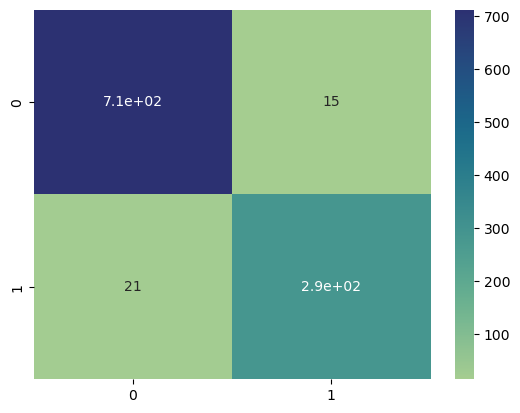

In [15]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='crest')

In [20]:
###K-nearest Neighbours

In [21]:
clf = KNeighborsClassifier(n_jobs=-1)

In [22]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=-1)

In [23]:
clf.score(X_test, y_test)

0.8280193236714976

In [24]:
y_pred = clf.predict(X_test)

In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.79      0.87       727
           1       0.65      0.92      0.76       308

    accuracy                           0.83      1035
   macro avg       0.80      0.86      0.81      1035
weighted avg       0.87      0.83      0.83      1035



<Axes: >

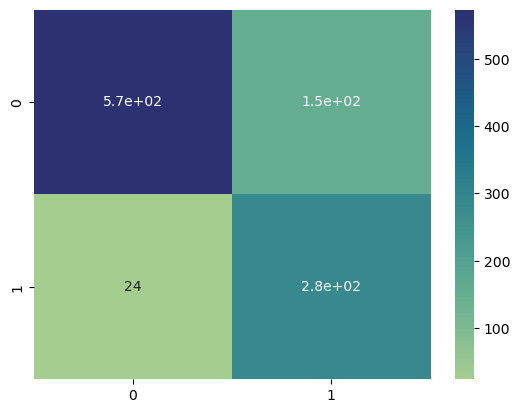

In [26]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='crest')